In [2]:
from os import listdir, makedirs
from os.path import join

import numpy as np
import pandas as pd

# from tqdm import tqdm_notebook

import tensorflow as tf

import keras
from keras.engine.input_layer import Input

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import plot_model, to_categorical

from keras.models import Sequential, load_model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv1D, BatchNormalization

from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K

import random, os, sys
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.initializers import *
import tensorflow as tf
from keras.engine.topology import Layer

pd.set_option('precision', 30)
np.set_printoptions(precision = 30)

np.random.seed(1)


In [4]:
### Generate 200 data point sequences, total 5000 
def gen_data(n=5000, top=40*np.pi, l=200):
    """
    The function generates x and sin(x) sequences
    n: number of sequences
    l: length of each sequence
    top: top x value
    """ 
    x = np.linspace(0, top, n) # evenly spread x points
    y = np.sin(x) + np.random.randn(n) * 0.1  # y = sin(x) plus normal_distributed variations
    
    # get 20 x data points, coresponding y points
    samples = np.random.randint(0, n-200, n//2)  # random pick starting data_point index
    x_data = []
    y_data = []
    for i in samples:
        x_temp = x[i:i+200]  # get 200 data point index
        y_temp = y[i+200]    # only get last value of y in the sequence for training and prediction
        x_data.append(x_temp)
        y_data.append(y_temp)
    x_data=np.array(x_data)
    x_data = np.expand_dims(x_data, -1)
    y_data=np.array(y_data)
    y_data = np.expand_dims(y_data, -1)
    return x_data, y_data        

In [5]:
x_data, y_data = gen_data(50000)  # Used gen_data function to get 50K data points

In [6]:
x_data.shape

(25000, 200, 1)

In [7]:
 y_data.shape

(25000, 1)

In [9]:
x_train, x_val, x_test = x_data[:20000], x_data[20000:22500], x_data[22500:]   
# Getting train, val and test data. No need to shuffle data because sample index was randomly selected 
# in gen_data()

In [10]:
y_train, y_val, y_test = y_data[:20000], y_data[20000:22500], y_data[22500:]

In [11]:
# import functions from Resnet50Conv1d_BN 
from Resnet50Conv1d_BN import identity_block, convolutional_block, ResNet50

In [12]:
# compile the model
keras.backend.clear_session()

model = ResNet50(input_shape = (200, 1), max_pool_s=2, max_strides=2, 
                         strides = 2, f=2, ave_pool_size=2, n_out=1) 
#model = load_model() 

model.compile(
    loss = "mse",
    optimizer = Adam(lr=0.0001),
    metrics=['mae'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 1)       0                                            
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 100, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding1d_1 (ZeroPadding1D (None, 106, 1)       0           max_pooling1d_1[0][0]            
__________________________________________________________________________________________________
conv1 (Conv1D)       

In [14]:
# training the model
batch_size = 1024
epochs = 400

checkpointer = ModelCheckpoint(
    './Resnet50Conv1d_sin', 
    verbose=2, 
    save_best_only=True)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                    callbacks=[checkpointer], validation_data=(x_val, y_val))

Train on 20000 samples, validate on 2500 samples
Epoch 1/400
20000/20000 [==============================] - 2s 108us/step - loss: 6.0335 - mean_absolute_error: 1.8005 - val_loss: 1.1338 - val_mean_absolute_error: 0.7147

Epoch 00001: val_loss improved from inf to 1.13377, saving model to ./Resnet50Conv1d_sin
Epoch 2/400
20000/20000 [==============================] - 2s 107us/step - loss: 4.8871 - mean_absolute_error: 1.6120 - val_loss: 1.0062 - val_mean_absolute_error: 0.6388

Epoch 00002: val_loss improved from 1.13377 to 1.00619, saving model to ./Resnet50Conv1d_sin
Epoch 3/400
20000/20000 [==============================] - 2s 107us/step - loss: 4.1620 - mean_absolute_error: 1.4754 - val_loss: 0.8713 - val_mean_absolute_error: 0.5866

Epoch 00003: val_loss improved from 1.00619 to 0.87130, saving model to ./Resnet50Conv1d_sin
Epoch 4/400
20000/20000 [==============================] - 2s 110us/step - loss: 3.6965 - mean_absolute_error: 1.3897 - val_loss: 0.8555 - val_mean_absolute_err

20000/20000 [==============================] - 2s 111us/step - loss: 0.8473 - mean_absolute_error: 0.5593 - val_loss: 0.4627 - val_mean_absolute_error: 0.2787

Epoch 00034: val_loss did not improve from 0.44629
Epoch 35/400
20000/20000 [==============================] - 2s 111us/step - loss: 0.8521 - mean_absolute_error: 0.5633 - val_loss: 0.4506 - val_mean_absolute_error: 0.2596

Epoch 00035: val_loss did not improve from 0.44629
Epoch 36/400
20000/20000 [==============================] - 2s 109us/step - loss: 0.8471 - mean_absolute_error: 0.5637 - val_loss: 0.5080 - val_mean_absolute_error: 0.3236

Epoch 00036: val_loss did not improve from 0.44629
Epoch 37/400
20000/20000 [==============================] - 2s 109us/step - loss: 0.8212 - mean_absolute_error: 0.5528 - val_loss: 0.4539 - val_mean_absolute_error: 0.2674

Epoch 00037: val_loss did not improve from 0.44629
Epoch 38/400
20000/20000 [==============================] - 2s 110us/step - loss: 0.7877 - mean_absolute_error: 0.530


Epoch 00069: val_loss did not improve from 0.40383
Epoch 70/400
20000/20000 [==============================] - 2s 105us/step - loss: 0.5416 - mean_absolute_error: 0.3799 - val_loss: 0.4019 - val_mean_absolute_error: 0.2371

Epoch 00070: val_loss improved from 0.40383 to 0.40187, saving model to ./Resnet50Conv1d_sin
Epoch 71/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.5462 - mean_absolute_error: 0.3781 - val_loss: 0.4502 - val_mean_absolute_error: 0.2797

Epoch 00071: val_loss did not improve from 0.40187
Epoch 72/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.5227 - mean_absolute_error: 0.3553 - val_loss: 0.4153 - val_mean_absolute_error: 0.2527

Epoch 00072: val_loss did not improve from 0.40187
Epoch 73/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.5247 - mean_absolute_error: 0.3604 - val_loss: 0.4615 - val_mean_absolute_error: 0.2989

Epoch 00073: val_loss did not improve from 0.40187
Epoch 74/4


Epoch 00105: val_loss did not improve from 0.35361
Epoch 106/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.4763 - mean_absolute_error: 0.3530 - val_loss: 0.3938 - val_mean_absolute_error: 0.2599

Epoch 00106: val_loss did not improve from 0.35361
Epoch 107/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.4601 - mean_absolute_error: 0.3364 - val_loss: 0.3744 - val_mean_absolute_error: 0.2383

Epoch 00107: val_loss did not improve from 0.35361
Epoch 108/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.4556 - mean_absolute_error: 0.3347 - val_loss: 0.3535 - val_mean_absolute_error: 0.2224

Epoch 00108: val_loss improved from 0.35361 to 0.35351, saving model to ./Resnet50Conv1d_sin
Epoch 109/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.4343 - mean_absolute_error: 0.3172 - val_loss: 0.3594 - val_mean_absolute_error: 0.2295

Epoch 00109: val_loss did not improve from 0.35351
Epoch 

20000/20000 [==============================] - 2s 106us/step - loss: 0.3939 - mean_absolute_error: 0.3099 - val_loss: 0.3617 - val_mean_absolute_error: 0.2805

Epoch 00141: val_loss did not improve from 0.30244
Epoch 142/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.4311 - mean_absolute_error: 0.3355 - val_loss: 0.3875 - val_mean_absolute_error: 0.2956

Epoch 00142: val_loss did not improve from 0.30244
Epoch 143/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.4396 - mean_absolute_error: 0.3573 - val_loss: 0.3747 - val_mean_absolute_error: 0.2903

Epoch 00143: val_loss did not improve from 0.30244
Epoch 144/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.4055 - mean_absolute_error: 0.3223 - val_loss: 0.3844 - val_mean_absolute_error: 0.2842

Epoch 00144: val_loss did not improve from 0.30244
Epoch 145/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.4049 - mean_absolute_error: 0

20000/20000 [==============================] - 2s 106us/step - loss: 0.3934 - mean_absolute_error: 0.3379 - val_loss: 0.3557 - val_mean_absolute_error: 0.3039

Epoch 00176: val_loss did not improve from 0.24307
Epoch 177/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.3789 - mean_absolute_error: 0.3321 - val_loss: 0.2893 - val_mean_absolute_error: 0.2475

Epoch 00177: val_loss did not improve from 0.24307
Epoch 178/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.3350 - mean_absolute_error: 0.2966 - val_loss: 0.2946 - val_mean_absolute_error: 0.2408

Epoch 00178: val_loss did not improve from 0.24307
Epoch 179/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.3131 - mean_absolute_error: 0.2699 - val_loss: 0.2617 - val_mean_absolute_error: 0.2030

Epoch 00179: val_loss did not improve from 0.24307
Epoch 180/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.3238 - mean_absolute_error: 0


Epoch 00211: val_loss did not improve from 0.21679
Epoch 212/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.2925 - mean_absolute_error: 0.2903 - val_loss: 0.2502 - val_mean_absolute_error: 0.2482

Epoch 00212: val_loss did not improve from 0.21679
Epoch 213/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.3138 - mean_absolute_error: 0.3130 - val_loss: 0.2401 - val_mean_absolute_error: 0.2357

Epoch 00213: val_loss did not improve from 0.21679
Epoch 214/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.2472 - mean_absolute_error: 0.2473 - val_loss: 0.2755 - val_mean_absolute_error: 0.2513

Epoch 00214: val_loss did not improve from 0.21679
Epoch 215/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.2501 - mean_absolute_error: 0.2470 - val_loss: 0.2195 - val_mean_absolute_error: 0.2102

Epoch 00215: val_loss did not improve from 0.21679
Epoch 216/400
20000/20000 [=====================

20000/20000 [==============================] - 2s 104us/step - loss: 0.1745 - mean_absolute_error: 0.1964 - val_loss: 0.1466 - val_mean_absolute_error: 0.1423

Epoch 00247: val_loss improved from 0.16794 to 0.14658, saving model to ./Resnet50Conv1d_sin
Epoch 248/400
20000/20000 [==============================] - 2s 103us/step - loss: 0.1899 - mean_absolute_error: 0.2153 - val_loss: 0.1872 - val_mean_absolute_error: 0.2052

Epoch 00248: val_loss did not improve from 0.14658
Epoch 249/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.2276 - mean_absolute_error: 0.2640 - val_loss: 0.2981 - val_mean_absolute_error: 0.3108

Epoch 00249: val_loss did not improve from 0.14658
Epoch 250/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.2022 - mean_absolute_error: 0.2359 - val_loss: 0.1567 - val_mean_absolute_error: 0.1734

Epoch 00250: val_loss did not improve from 0.14658
Epoch 251/400
20000/20000 [==============================] - 2s 104us/st


Epoch 00282: val_loss improved from 0.11507 to 0.10913, saving model to ./Resnet50Conv1d_sin
Epoch 283/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1361 - mean_absolute_error: 0.1865 - val_loss: 0.1193 - val_mean_absolute_error: 0.1551

Epoch 00283: val_loss did not improve from 0.10913
Epoch 284/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1621 - mean_absolute_error: 0.2212 - val_loss: 0.1344 - val_mean_absolute_error: 0.1731

Epoch 00284: val_loss did not improve from 0.10913
Epoch 285/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1588 - mean_absolute_error: 0.2211 - val_loss: 0.1712 - val_mean_absolute_error: 0.2219

Epoch 00285: val_loss did not improve from 0.10913
Epoch 286/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1894 - mean_absolute_error: 0.2555 - val_loss: 0.1768 - val_mean_absolute_error: 0.2475

Epoch 00286: val_loss did not improve from 0.10913
Epoch 

20000/20000 [==============================] - 2s 107us/step - loss: 0.1667 - mean_absolute_error: 0.2650 - val_loss: 0.0938 - val_mean_absolute_error: 0.1620

Epoch 00318: val_loss improved from 0.09817 to 0.09382, saving model to ./Resnet50Conv1d_sin
Epoch 319/400
20000/20000 [==============================] - 2s 110us/step - loss: 0.1301 - mean_absolute_error: 0.2129 - val_loss: 0.0993 - val_mean_absolute_error: 0.1631

Epoch 00319: val_loss did not improve from 0.09382
Epoch 320/400
20000/20000 [==============================] - 2s 109us/step - loss: 0.1321 - mean_absolute_error: 0.2163 - val_loss: 0.1084 - val_mean_absolute_error: 0.1803

Epoch 00320: val_loss did not improve from 0.09382
Epoch 321/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.1002 - mean_absolute_error: 0.1751 - val_loss: 0.0841 - val_mean_absolute_error: 0.1460

Epoch 00321: val_loss improved from 0.09382 to 0.08407, saving model to ./Resnet50Conv1d_sin
Epoch 322/400
20000/20000 [===


Epoch 00353: val_loss did not improve from 0.07521
Epoch 354/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.0995 - mean_absolute_error: 0.1990 - val_loss: 0.0832 - val_mean_absolute_error: 0.1719

Epoch 00354: val_loss did not improve from 0.07521
Epoch 355/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.1095 - mean_absolute_error: 0.2080 - val_loss: 0.1198 - val_mean_absolute_error: 0.2220

Epoch 00355: val_loss did not improve from 0.07521
Epoch 356/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.1818 - mean_absolute_error: 0.2941 - val_loss: 0.1300 - val_mean_absolute_error: 0.2405

Epoch 00356: val_loss did not improve from 0.07521
Epoch 357/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1579 - mean_absolute_error: 0.2764 - val_loss: 0.1010 - val_mean_absolute_error: 0.2104

Epoch 00357: val_loss did not improve from 0.07521
Epoch 358/400
20000/20000 [=====================

20000/20000 [==============================] - 2s 107us/step - loss: 0.0816 - mean_absolute_error: 0.1870 - val_loss: 0.0932 - val_mean_absolute_error: 0.2040

Epoch 00390: val_loss did not improve from 0.06112
Epoch 391/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1124 - mean_absolute_error: 0.2328 - val_loss: 0.1076 - val_mean_absolute_error: 0.2131

Epoch 00391: val_loss did not improve from 0.06112
Epoch 392/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1320 - mean_absolute_error: 0.2568 - val_loss: 0.0839 - val_mean_absolute_error: 0.1922

Epoch 00392: val_loss did not improve from 0.06112
Epoch 393/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.0947 - mean_absolute_error: 0.2122 - val_loss: 0.1828 - val_mean_absolute_error: 0.2675

Epoch 00393: val_loss did not improve from 0.06112
Epoch 394/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.0808 - mean_absolute_error: 0

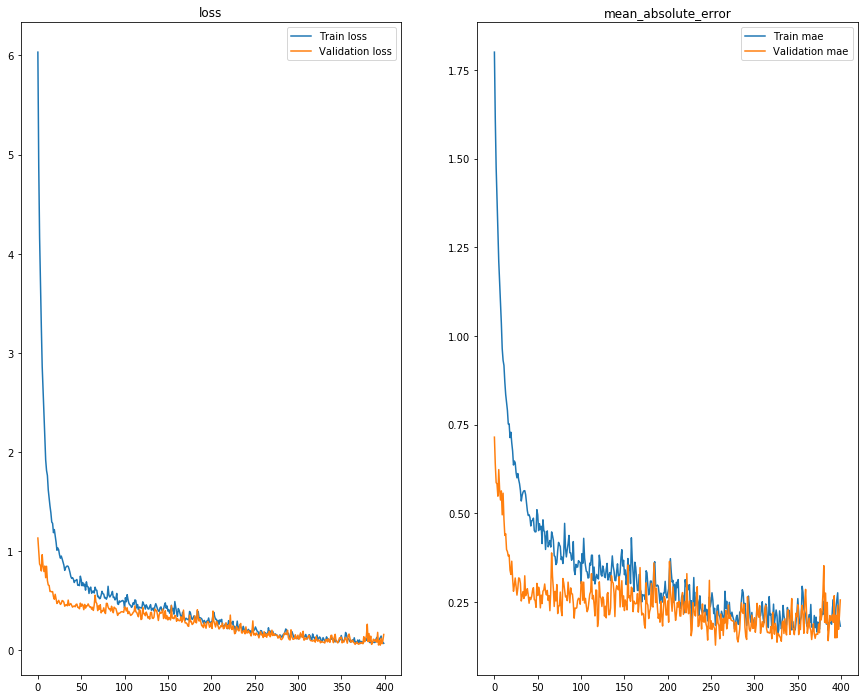

In [15]:
# plotting the loss, and mean absolute error
fig, ax = plt.subplots(1, 2, figsize=(15,12))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('mean_absolute_error')
ax[1].plot(history.epoch, history.history["mean_absolute_error"], label="Train mae")
ax[1].plot(history.epoch, history.history["val_mean_absolute_error"], label="Validation mae")
ax[0].legend()
ax[1].legend()

In [18]:
# Getting prediction for the test data
y_test_pred = model.predict(x_test)

In [19]:
y_test.shape

(2500, 1)

In [20]:
y_test_pred.shape

(2500, 1)

In [21]:
# We predicted the last Y value of 200 long sequence, getting the last value of x for the plotting
x_test_100 = x_test[:,199,:]

In [22]:
x = np.linspace(0, 40*np.pi, 2000)

In [23]:
y = np.sin(x) + np.random.randn(2000) * 0.1

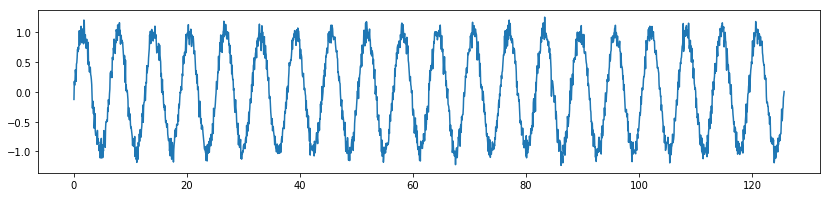

In [24]:
# Plotting y=sin(x) plot
plt.subplots(figsize=(14, 3))
plt.plot(x, y)

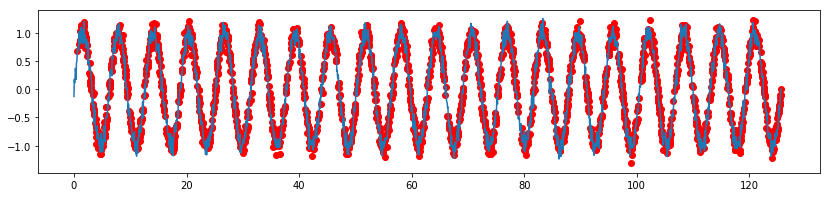

In [25]:
# plot x_test, y_test onto sin(x)
plt.subplots(figsize=(14, 3))
plt.plot(x, y)
plt.scatter(x_test_100, y_test, color='r')

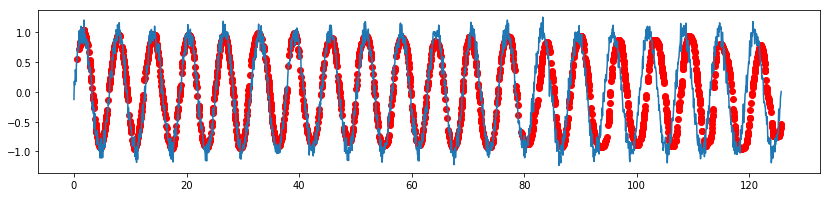

In [26]:
# plot x_test, y_test_pred onto sin(x). Predictions were really good at small x values (< 90).  
# Predictions appear larger x>90 
plt.subplots(figsize=(14, 3))
plt.plot(x, y)
plt.scatter(x_test_100, y_test_pred, color='r')